# 1. 라이브러리 및 데이터 불러오기

In [2]:
!pip install kmodes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

from sklearn.decomposition import PCA
import numpy as np

**시각화 한글 설정**

In [4]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [5]:
data = pd.read_csv('/content/drive/MyDrive/CARD-LANGCHAIN/data/customer_top3_payment.csv')

In [6]:
data.head()

,발급회원번호,남녀구분코드,연령,Life_Stage,top1,top2,top3
0,SYN_0,2,40대,5.자녀성장기(2),납부,쇼핑,사교활동
1,SYN_1,1,30대,4.자녀성장기(1),쇼핑,납부,교통
2,SYN_2,2,40대,4.자녀성장기(1),쇼핑,사교활동,요식
3,SYN_3,1,40대,4.자녀성장기(1),교통,쇼핑,요식
4,SYN_7,2,50대,5.자녀성장기(2),납부,쇼핑,요식


In [7]:
# 발급회원번호 없앤 df
df_data = data.drop('발급회원번호',axis=1)

In [8]:
df_data['Life_Stage'].unique()

array(['5.자녀성장기(2)', '4.자녀성장기(1)', '1.Single', '3.자녀출산기', '6.자녀출가기',
       '7.노령', '2.가족형성기'], dtype=object)

In [9]:
df_data['Life_Stage'].head(10)

,Life_Stage
0,5.자녀성장기(2)
1,4.자녀성장기(1)
2,4.자녀성장기(1)
3,4.자녀성장기(1)
4,5.자녀성장기(2)
5,1.Single
6,3.자녀출산기
7,6.자녀출가기
8,4.자녀성장기(1)
9,4.자녀성장기(1)


In [10]:
df_data['LifeStage'] = ['미혼' if c == '1.Single' else "노령" if c == "7.노령" else "기혼" for c in df_data['Life_Stage']]

In [11]:
df_data=df_data.drop('Life_Stage',axis=1)

In [12]:
df_data.rename(columns={'남녀구분코드':'성별'},inplace=True)

In [13]:
df_data.head()

,성별,연령,top1,top2,top3,LifeStage
0,2,40대,납부,쇼핑,사교활동,기혼
1,1,30대,쇼핑,납부,교통,기혼
2,2,40대,쇼핑,사교활동,요식,기혼
3,1,40대,교통,쇼핑,요식,기혼
4,2,50대,납부,쇼핑,요식,기혼


In [ ]:
df_data['top1'].value_counts()

,count
top1,
쇼핑,1307496
납부,503451
교통,239705
사교활동,160254
교육,100348
의료,41595
해외,39497
여유생활,6374
일상생활,615


In [ ]:
df_data['top2'].unique()

array(['쇼핑', '납부', '사교활동', '교통', '요식', '의료', '여유생활', '교육', '해외', '일상생활'],
      dtype=object)

# 2. 원핫인코딩 진행

In [14]:
df = df_data.drop(['top2','top3'],axis=1)

In [15]:
df_encoded = pd.get_dummies(df)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399344 entries, 0 to 2399343
Data columns (total 20 columns):
 #   Column        Dtype
---  ------        -----
 0   성별            int64
 1   연령_20대        bool 
 2   연령_30대        bool 
 3   연령_40대        bool 
 4   연령_50대        bool 
 5   연령_60대        bool 
 6   연령_70대이상      bool 
 7   top1_교육       bool 
 8   top1_교통       bool 
 9   top1_납부       bool 
 10  top1_사교활동     bool 
 11  top1_쇼핑       bool 
 12  top1_여유생활     bool 
 13  top1_요식       bool 
 14  top1_의료       bool 
 15  top1_일상생활     bool 
 16  top1_해외       bool 
 17  LifeStage_기혼  bool 
 18  LifeStage_노령  bool 
 19  LifeStage_미혼  bool 
dtypes: bool(19), int64(1)
memory usage: 61.8 MB


In [ ]:
df_encoded.head()

,성별,연령_20대,연령_30대,연령_40대,연령_50대,연령_60대,연령_70대이상,top1_교육,top1_교통,top1_납부,top1_사교활동,top1_쇼핑,top1_여유생활,top1_요식,top1_의료,top1_일상생활,top1_해외,LifeStage_기혼,LifeStage_노령,LifeStage_미혼
0,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,1,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,2,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


# 2. 엘보우 방법 확인

In [ ]:
# # Elbow curve to find optimal K
# cost = []
# K = range(1,8)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(data)
#     cost.append(kmode.cost_)

# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6344348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6344348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6344348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6344348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6344348.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1106135, cost: 5141868.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 667970, cost: 5141868.0
Init: initializing centroids
Init: initializing cl

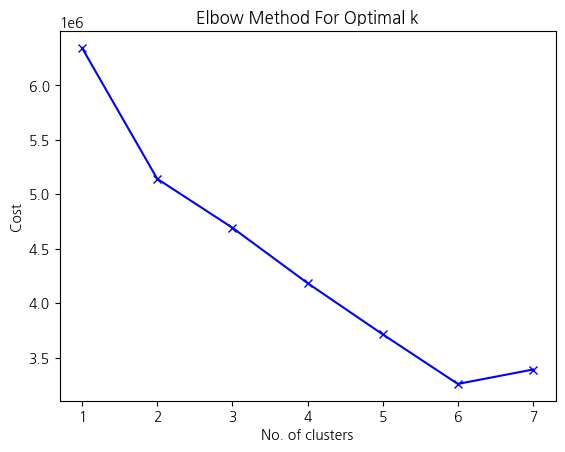

In [ ]:
# # Elbow curve to find optimal K
# cost = []
# K = range(1,8)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(df_encoded)
#     cost.append(kmode.cost_)

# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

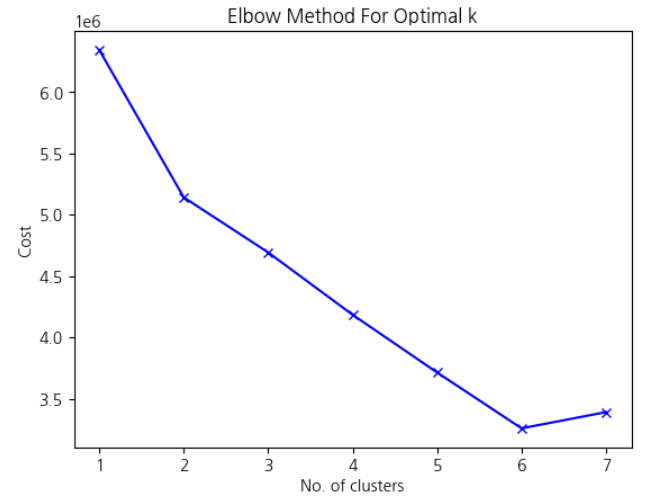

In [16]:
kmode = KModes(n_clusters=6, init='random', n_init=5, verbose=1)
clusters = kmode.fit_predict(df_encoded)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 742485, cost: 3856116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 457553, cost: 3617196.0
Run 2, iteration: 2/100, moves: 200958, cost: 3617196.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 479850, cost: 3985975.0
Run 3, iteration: 2/100, moves: 68854, cost: 3985975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 300473, cost: 3906537.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 413970, cost: 4007642.0
Run 5, iteration: 2/100, moves: 63141, cost: 4007642.0
Best run was number 2


array([3, 4, 0, ..., 0, 2, 0], dtype=uint16)

In [17]:
df_encoded.insert(0, 'Cluster',clusters, True)
df_encoded

,Cluster,성별,연령_20대,연령_30대,연령_40대,연령_50대,연령_60대,연령_70대이상,top1_교육,top1_교통,...,top1_사교활동,top1_쇼핑,top1_여유생활,top1_요식,top1_의료,top1_일상생활,top1_해외,LifeStage_기혼,LifeStage_노령,LifeStage_미혼
0,3,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,4,1,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,0,2,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,3,1,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,0,2,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399339,0,2,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2399340,0,1,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2399341,0,2,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2399342,2,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
df_encoded.to_csv('전체로 kmode진행한 data.csv',index=False)

# **결제 TOP1 feature로 고객 분류 후, 성별과 연령으로 다시 나누기**

In [18]:
data.head()

,발급회원번호,남녀구분코드,연령,Life_Stage,top1,top2,top3
0,SYN_0,2,40대,5.자녀성장기(2),납부,쇼핑,사교활동
1,SYN_1,1,30대,4.자녀성장기(1),쇼핑,납부,교통
2,SYN_2,2,40대,4.자녀성장기(1),쇼핑,사교활동,요식
3,SYN_3,1,40대,4.자녀성장기(1),교통,쇼핑,요식
4,SYN_7,2,50대,5.자녀성장기(2),납부,쇼핑,요식


In [20]:
encoded_df2 = pd.get_dummies(data['top1'])

encoded_df2

,교육,교통,납부,사교활동,쇼핑,여유생활,요식,의료,일상생활,해외
0,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2399339,False,False,False,False,True,False,False,False,False,False
2399340,False,False,False,True,False,False,False,False,False,False
2399341,False,False,False,False,True,False,False,False,False,False
2399342,False,False,True,False,False,False,False,False,False,False


## 적절한 clusters 수 구하기

### **1. 엘보우 방법**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2183696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2183696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2183696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2183696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2183696.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters
Star

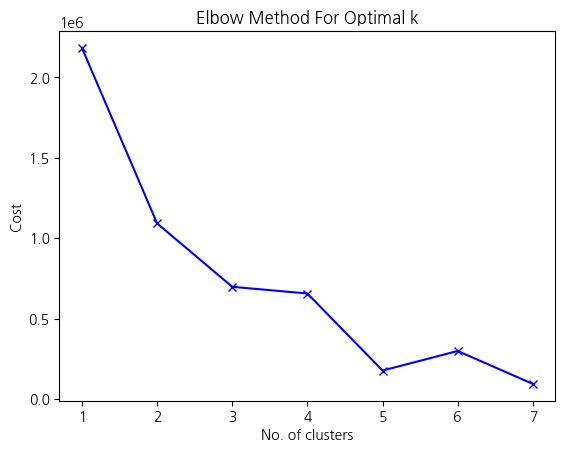

In [21]:
# Elbow curve to find optimal K
cost = []
K = range(1,8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(encoded_df2)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### **2. 실루엣 스코어**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2183696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1863188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters


KeyboardInterrupt: 

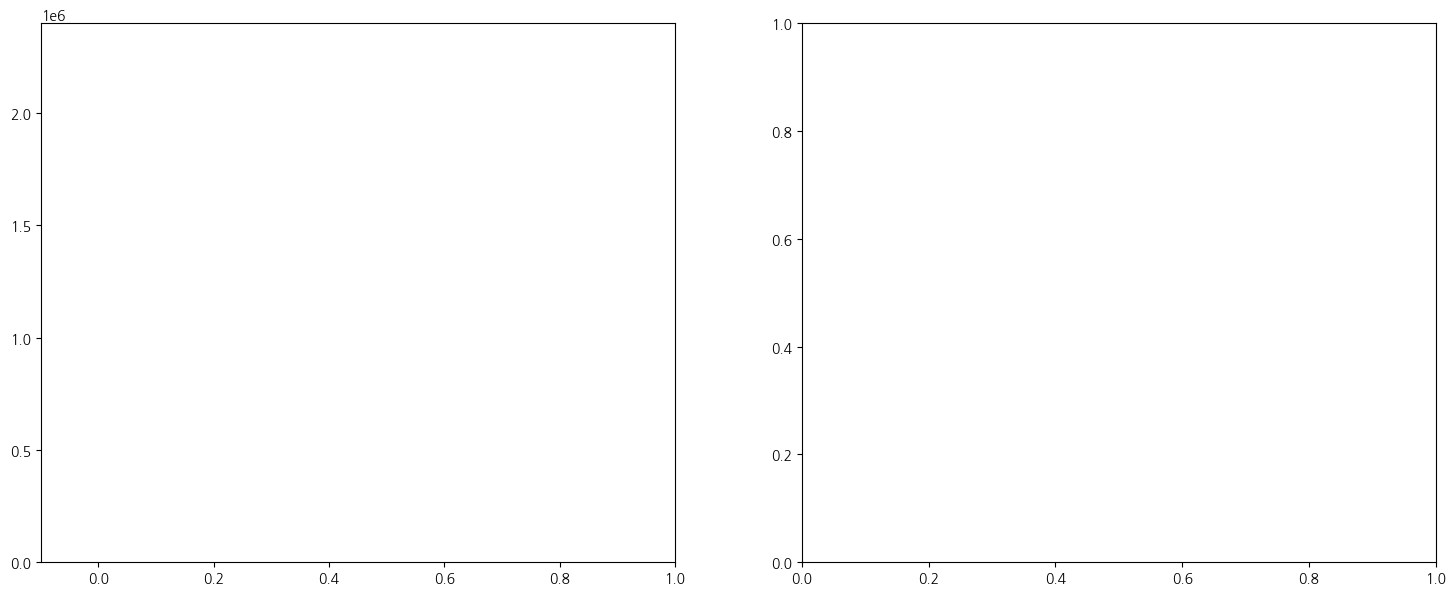

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,7):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(encoded_df2) + (n_clusters + 1) * 10])

  clusterer = KModes(n_clusters=n_clusters, init = "random", n_init = 5, verbose=1)
  cluster_labels = clusterer.fit_predict(encoded_df2)

  silhouette_avg = silhouette_score(encoded_df2, cluster_labels)
  print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(encoded_df2, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
  centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

  for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_silhouette(X, num_clusters):
  for n_clusters in range(2,num_clusters+1):
    # Create a subplot with 1row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot : silhouette plot
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1)  * 10])
    clusterer = KModes(n_clusters=n_clusters, init = "random", n_init = 5, verbose=1)
    cluster_labels = clusterer.fit_predict(encoded_df2)

    silhouette_avg = silhouette_score(encoded_df2, cluster_labels)
    print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(encoded_df2, cluster_labels)
    y_lower = 10
    for i in range(n_clusters+1):

      # cluster i , sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_between(np.arange(y_lower, y_upper),
                       0, ith_cluster_silhouette_values,
                       facecolor = color, edgecolor=color, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8,1])

    # 2nd plot : the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0,alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusters.cluster_centers_
    # Draw white circles at clusters centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c='white',alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], markers='$%d$' % i, alpha = 1,
                  s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    plt.suptitle(("Silhouette analysis for KModes clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 503451, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 503451, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1091848.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1176794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 503451, cost: 1176794.0
Best run was number 3


KeyboardInterrupt: 

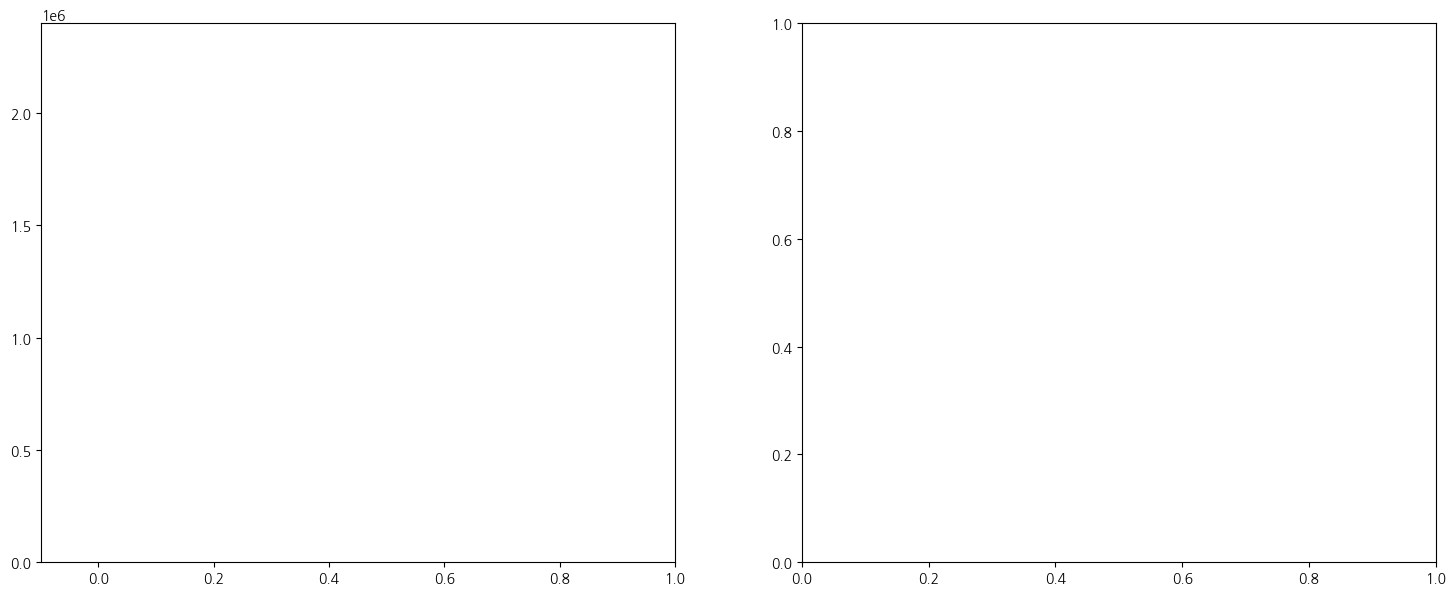

In [29]:
plot_silhouette(encoded_df2, 6)